In [19]:
# Задание 1. 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df_report = pd.read_csv("HR.csv")
df_report.columns = df_report.columns.str.lower() 
df_report.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [85]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [99]:
# Задание 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

#мода
df_report.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#медиана
df_report.median()

C:\Users\U_M1B6P\AppData\Local\Temp\ipykernel_12868\2404428738.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_report.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [97]:
#среднее, мин и макс
df_report.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [95]:
#ср откл
df_report.std(ddof=1)

C:\Users\U_M1B6P\AppData\Local\Temp\ipykernel_12868\2795528504.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_report.std(ddof=1)


satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [28]:
#Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

from sklearn.cluster import KMeans
from pylab import rcParams
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_20newsgroups, load_files
from scipy.sparse import csr_matrix

import os
import re


In [7]:
df_report_numbers = df_report[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','work_accident','left','promotion_last_5years']]
df_report_numbers.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [15]:
df_report_numbers.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [16]:
df_report_numbers.corr(method='spearman')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


<AxesSubplot: >

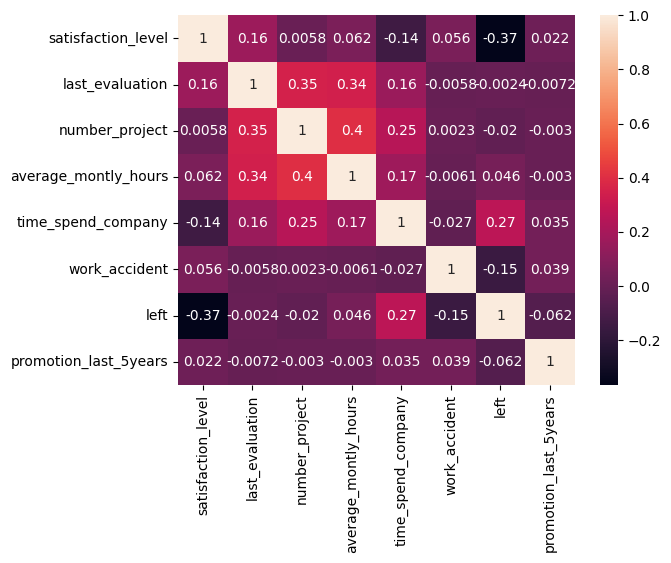

In [20]:
xx= df_report_numbers.corr(method='spearman')
sns.heatmap(xx, annot=True)

In [54]:
df_report_numbers[['number_project', 'work_accident']].corr(method='spearman')


,number_project,work_accident
number_project,1.000000,0.002328
work_accident,0.002328,1.000000


In [56]:
df_report_numbers[['average_montly_hours', 'number_project']].corr(method='spearman')


,average_montly_hours,number_project
average_montly_hours,1.000000,0.397855
number_project,0.397855,1.000000


In [43]:
#Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте.
df_report.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

In [57]:
#Задание 5. Показать распределение сотрудников по зарплатам.

Department.unstack()

count             
salary       high   low medium
department                    
IT             83   609    535
RandD          51   364    372
accounting     74   358    335
hr             45   335    359
management    225   180    225
marketing      80   402    376
product_mng    68   451    383
sales         269  2099   1772
support       141  1146    942
technical     201  1372   1147

<AxesSubplot: xlabel='department'>

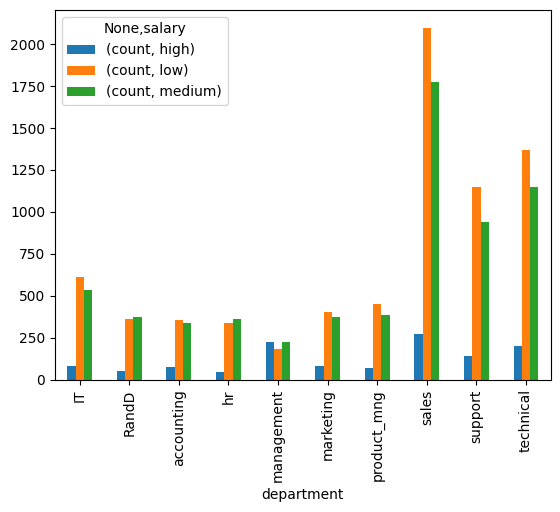

In [58]:
Department.unstack().plot(kind='bar')


In [63]:
#Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

df_n = df_report.groupby([df_report['department'],df_report['salary']])[['salary']].count()
df_n

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

In [26]:
#Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

df_high = df_report[df_report['salary'] == 'high']['average_montly_hours']
df_high

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

In [27]:
df_low = df_report[df_report['salary'] == 'low']['average_montly_hours']
df_low

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

In [28]:
from scipy import stats
result = stats.ttest_ind(a=df_low, b=df_high, equal_var=False)
print(result)
if (result.pvalue < 0.001):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


In [42]:
# Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): a) Доля сотрудников с повышением за последние 5 лет; b) Средняя степень удовлетворенности; c) Среднее количество проектов.

workers = df_report['left'].count()
print(f' Количество сотрудников {workers}')

df_left = df_report.groupby(df_report['left'] == 1)['promotion_last_5years'].sum()
print(f' Сотрудники уволившиеся после повышения : {df_left[1]}')

l = df_left[1]/workers*100
print(f' Доля сотрудников уволившихся после повышения: {l.round(1)}%')

df_not_left = df_report.groupby(df_report['left'] == 0)['promotion_last_5years'].sum()
print(f' Сотрудники оставшиеся работать после повышения : {df_not_left[1]}')

d = df_not_left[1]/workers*100
print(f' Доля сотрудников не уволившихся после повышения: {d.round(1)}%')

 Количество сотрудников 14999
 Сотрудники уволившиеся после повышения : 19
 Доля сотрудников уволившихся после повышения: 0.1%
 Сотрудники оставшиеся работать после повышения : 300
 Доля сотрудников не уволившихся после повышения: 2.0%


In [65]:
df_workers_left = df_report.groupby(df_report['left'] == 1)['satisfaction_level'].mean()
df_workers_left
print(f' Средняя степень удовлетворения у уволившихся : {df_workers_left[1]}')

df_workers_not_left = df_report.groupby(df_report['left'] == 0)['satisfaction_level'].mean()
df_workers_not_left
print(f' Средняя степень удовлетворения у не уволившихся : {df_workers_not_left[1]}')

 Средняя оценка удовлетворения у уволившихся : 0.44009801176141133
 Средняя оценка удовлетворения у  не уволившихся : 0.666809590479524


In [66]:
df_projects_left = df_report.groupby(df_report['left'] == 1)['number_project'].mean()
df_projects_left
print(f' Среднее количество проектов у уволившихся : {df_project_left[1]}')

df_projects_not_left = df_report.groupby(df_report['left'] == 0)['number_project'].mean()
print(f' Среднее количество проектов у не уволившихся : {df_project_not_left[1]}')

 Среднее количество проектов у уволившихся : 3.8555026603192384
 Среднее количество проектов у не уволившихся : 3.786664333216661


In [84]:
# Задание 3. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки.

df_report_numbers = df_report.drop(['department', 'salary', 'left'], axis=1)
df_report_numbers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [85]:
df_trgt = df_report['left']
y = df_trgt

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_report_numbers, y, test_size=0.25, random_state = 12)

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 


In [88]:
lr = LinearDiscriminantAnalysis()


In [89]:
lr.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [90]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
accuracy_score(y_test, y_pred)


0.7533333333333333

In [92]:
X_test['predickt'] = y_pred 
X_test['test'] = y_test
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,predickt,test
2429,0.47,0.86,4,169,6,0,0,0,0
14527,0.43,0.47,2,135,3,0,0,0,1
13038,0.65,0.98,3,252,2,0,0,0,0
7160,0.46,0.53,3,135,2,0,0,0,0
1662,0.81,0.83,5,269,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10977,0.16,0.61,4,171,6,0,0,1,0
1316,0.88,1.00,5,247,5,0,0,0,1
1288,0.87,0.81,5,304,5,0,0,0,1
2264,0.47,0.64,3,192,3,0,0,0,0


In [93]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)

In [94]:
results 


array([[2596,  238],
       [ 687,  229]], dtype=int64)